# MSR 2018 Challenge Notebook
This notebook contains the work done for the analysis for Tyson Bulmer's MSR 2018 Challgne paper using the supplied dataset.

In [1]:
import psycopg2
import psycopg2.extras
import pandas as pd
import numpy as np

# To deal with right skewness we can take the log of the values
import math

import matplotlib.pyplot as plt

# Configure display of dataframe visualizations
pd.options.display.mpl_style = 'default'

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2862: FutureWarning: 
mpl_style had been deprecated and will be removed in a future version.
Use `matplotlib.pyplot.style.use` instead.

  exec(code_obj, self.user_global_ns, self.user_ns)


## Connect to database and get event data

In [2]:
conn = psycopg2.connect("dbname='msr2018' user='Tyson' host='localhost' password=''")

In [3]:
cur = conn.cursor()

In [4]:
cur.execute("""select event_type, idesessionuuid, triggeredat, duration from events""")

In [5]:
colnames = [desc[0] for desc in cur.description]

In [6]:
rows = cur.fetchall()

In [7]:
results = pd.DataFrame([list(row) for row in rows], columns=colnames)

In [8]:
# Clean up events column strings
results['event_type'] = results['event_type'].apply(lambda x:'.'.join(x.split(',')[0].split('.')[4:]))

In [9]:
results

,event_type,idesessionuuid,triggeredat,duration
0,ActivityEvent,54f05bcc-4085-4666-86a2-6466e8c968b8,2016-07-28 15:44:55.056726,00:00:09.9354023
1,VisualStudio.WindowEvent,cfdc7316-07c6-4331-b203-14b1f516b8fb,2016-07-29 09:23:21.737755,00:00:00
2,VisualStudio.WindowEvent,54f05bcc-4085-4666-86a2-6466e8c968b8,2016-07-28 14:27:17.531701,00:00:00
3,NavigationEvent,6cd891a5-73a2-4b73-ad8d-995767e224fc,2016-08-05 13:58:36.876142,None
4,VisualStudio.WindowEvent,cfdc7316-07c6-4331-b203-14b1f516b8fb,2016-07-29 08:08:41.000562,00:00:00
5,VisualStudio.EditEvent,6cd891a5-73a2-4b73-ad8d-995767e224fc,2016-08-05 15:22:01.024082,00:00:04.7339743
6,CommandEvent,54f05bcc-4085-4666-86a2-6466e8c968b8,2016-07-28 10:29:56.290510,None
7,CommandEvent,50cdff93-c53d-4a28-bffa-84e67dd63268,2016-07-27 14:56:08.654509,None
8,VisualStudio.WindowEvent,54f05bcc-4085-4666-86a2-6466e8c968b8,2016-07-28 10:30:12.867166,00:00:00
9,CommandEvent,cfdc7316-07c6-4331-b203-14b1f516b8fb,2016-07-29 08:34:04.536413,None


## Play with a filtered set

In [10]:
tool_events = [
    'CommandEvent', 'NavigationEvent',
    'CompletionEvents.CompletionEvent',
       'VisualStudio.EditEvent',
       'VisualStudio.DebuggerEvent', 'SystemEvent',
       'UserProfiles.UserProfileEvent', 'VisualStudio.BuildEvent',
       'TestRunEvents.TestRunEvent', 'VisualStudio.FindEvent'
]

# tool_events = [
#     'CommandEvent', 'NavigationEvent', 'VisualStudio.WindowEvent',
#        'ActivityEvent', 'CompletionEvents.CompletionEvent',
#        'VisualStudio.EditEvent', 'VisualStudio.DocumentEvent',
#        'VisualStudio.DebuggerEvent', 'SystemEvent',
#        'VisualStudio.SolutionEvent', 'VisualStudio.IDEStateEvent',
#        'UserProfiles.UserProfileEvent', 'VisualStudio.BuildEvent',
#        'TestRunEvents.TestRunEvent',
#        'VersionControlEvents.VersionControlEvent', 'VisualStudio.FindEvent'
# ]

In [11]:
tool_usage_results = results[results['event_type'].isin(tool_events)]
tool_usage_results

,event_type,idesessionuuid,triggeredat,duration
3,NavigationEvent,6cd891a5-73a2-4b73-ad8d-995767e224fc,2016-08-05 13:58:36.876142,None
5,VisualStudio.EditEvent,6cd891a5-73a2-4b73-ad8d-995767e224fc,2016-08-05 15:22:01.024082,00:00:04.7339743
6,CommandEvent,54f05bcc-4085-4666-86a2-6466e8c968b8,2016-07-28 10:29:56.290510,None
7,CommandEvent,50cdff93-c53d-4a28-bffa-84e67dd63268,2016-07-27 14:56:08.654509,None
9,CommandEvent,cfdc7316-07c6-4331-b203-14b1f516b8fb,2016-07-29 08:34:04.536413,None
10,VisualStudio.EditEvent,824ca5d7-6dd5-44f6-9a80-a8c6bd4a1169,2016-08-08 14:55:10.303176,00:00:02.1601355
13,VisualStudio.EditEvent,cfdc7316-07c6-4331-b203-14b1f516b8fb,2016-07-29 10:53:51.566307,00:00:02.5706302
15,CommandEvent,6cd891a5-73a2-4b73-ad8d-995767e224fc,2016-08-05 15:04:59.375629,None
16,CommandEvent,54f05bcc-4085-4666-86a2-6466e8c968b8,2016-07-28 15:37:03.607866,None
17,VisualStudio.EditEvent,c21d43d5-7a60-4d50-a557-f6736cd5193d,2016-07-27 14:27:37.369409,00:00:02.5040490


## Define some helper functions for analyzing the data

In [12]:
take_log = lambda x: math.log(float(x)+1)

In [13]:
def plot_distribution(data, *, x_label, y_label, logged_distribution=True):
    plt.clf()
    fig, axes = plt.subplots(nrows=1, ncols=1)
    if logged_distribution:
        data = data.apply(take_log)
    data.hist(ax=axes)
    fig.text(0.5, 0.04,x_label, ha='center', rotation='horizontal')
    fig.text(.04, 0.5, y_label, va='center', rotation='vertical')
    plt.show()

## Look into the data

In [14]:
unique_events = results['event_type'].unique()

In [15]:
print("Number of unique events:", len(unique_events))

Number of unique events: 16


In [16]:
unique_events

array(['ActivityEvent', 'VisualStudio.WindowEvent', 'NavigationEvent',
       'VisualStudio.EditEvent', 'CommandEvent',
       'VisualStudio.SolutionEvent', 'VisualStudio.DebuggerEvent',
       'VisualStudio.BuildEvent', 'VisualStudio.DocumentEvent',
       'SystemEvent', 'CompletionEvents.CompletionEvent',
       'VisualStudio.FindEvent', 'VisualStudio.IDEStateEvent',
       'VersionControlEvents.VersionControlEvent',
       'TestRunEvents.TestRunEvent', 'UserProfiles.UserProfileEvent'], dtype=object)

## Group the sessions and analyze counts of events per session

In [17]:
grouped_sessions = tool_usage_results.groupby('idesessionuuid')

In [113]:
grouped_sessions.size().describe(percentiles=[.1, .25, .5, .75, .9])

count      3347.000000
mean       3206.645055
std       12482.520739
min           1.000000
10%          12.000000
25%          50.000000
50%         268.000000
75%        1835.500000
90%        6762.000000
max      353585.000000
dtype: float64

In [105]:
grouped_sessions.size().apply(take_log).describe()

count    3347.000000
mean        5.698828
std         2.354072
min         0.693147
25%         3.931826
50%         5.594711
75%         7.515617
max        12.775882
dtype: float64

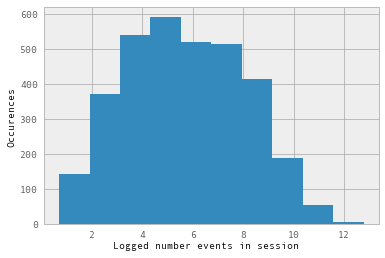

In [106]:
plot_distribution(grouped_sessions.size(), x_label='Logged number events in session', y_label='Occurences')

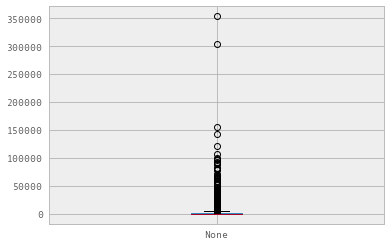

In [111]:
grouped_sessions.size().plot(kind='box')

In [116]:
np.percentile(grouped_sessions.size(), 5)

6.0

## Group the data by event_type to gt an idea of its distribution

In [107]:
grouped_events = results.groupby('event_type')

In [108]:
grouped_events.size().describe()

count    1.600000e+01
mean     6.707901e+05
std      2.137496e+06
min      2.550000e+02
25%      4.829500e+03
50%      5.882600e+04
75%      2.813652e+05
max      8.660216e+06
dtype: float64

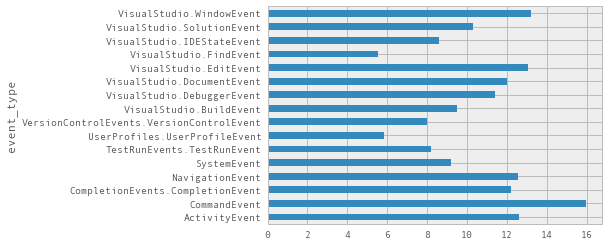

In [109]:
grouped_events.size().apply(take_log).plot(kind='barh')

## Identifying patterns

### Method 1: See if any sessions did have exact same patterns

In [18]:
from collections import defaultdict
naive_pattern_dict = defaultdict(int)
for session, group in grouped_sessions:
    event_string = '-'.join(group['event_type'].str.lower())
    naive_pattern_dict[event_string] += 1

In [19]:
print("Unique session patterns: ", len(naive_pattern_dict))

Unique session patterns:  2719


In [20]:
sorted(naive_pattern_dict.items(), key=lambda x: x[1], reverse=True)[:20]

[('commandevent', 118),
 ('commandevent-commandevent', 85),
 ('commandevent-commandevent-commandevent', 65),
 ('commandevent-commandevent-commandevent-commandevent', 58),
 ('commandevent-commandevent-commandevent-commandevent-commandevent', 43),
 ('commandevent-commandevent-commandevent-commandevent-commandevent-commandevent',
  32),
 ('userprofiles.userprofileevent', 24),
 ('commandevent-commandevent-commandevent-commandevent-commandevent-commandevent-commandevent',
  23),
 ('commandevent-commandevent-commandevent-commandevent-commandevent-commandevent-commandevent-commandevent-commandevent-commandevent',
  19),
 ('commandevent-commandevent-commandevent-commandevent-commandevent-commandevent-commandevent-commandevent-commandevent',
  18),
 ('commandevent-commandevent-commandevent-commandevent-commandevent-commandevent-commandevent-commandevent',
  15),
 ('visualstudio.editevent-commandevent', 9),
 ('commandevent-visualstudio.editevent', 9),
 ('commandevent-commandevent-commandevent-co

### Method 2: Abstract down patterns
Reduce the patterns of events to things such as command+, selection, command ...

Few possible options here:

1) abstract with the + notation

2) abstract with essentially the * notation

3) instead do sets, so order doesnt matter, then see which commands are used together more than not

In [21]:
# Option 1
abstracted_pattern_dict_1 = defaultdict(int)
for session, group in grouped_sessions:
    prev = ''
    new = []
    for token in group['event_type'].str.lower():
        if token != prev:
            new.append(token)
            prev = token
        else:
            new.pop()
            new.append(token + '+')
    event_string = '-'.join(new)
    abstracted_pattern_dict_1[event_string] += 1

In [22]:
print("Option 1: Unique session patterns: ", len(abstracted_pattern_dict_1))

Option 1: Unique session patterns:  2501


In [23]:
sorted(abstracted_pattern_dict_1.items(), key=lambda x: x[1], reverse=True)[:10]

[('commandevent+', 446),
 ('commandevent', 118),
 ('commandevent+-visualstudio.editevent-commandevent+', 47),
 ('userprofiles.userprofileevent', 24),
 ('commandevent+-visualstudio.editevent-commandevent+-visualstudio.editevent-commandevent+',
  15),
 ('commandevent+-userprofiles.userprofileevent-commandevent+', 13),
 ('visualstudio.editevent-commandevent+', 12),
 ('commandevent+-navigationevent-commandevent+', 12),
 ('commandevent+-visualstudio.editevent-commandevent', 11),
 ('commandevent+-visualstudio.editevent', 9)]

In [24]:
# Option 2
abstracted_pattern_dict_2 = defaultdict(int)
for session, group in grouped_sessions:
    prev = ''
    new = []
    for token in group['event_type'].str.lower():
        if token != prev:
            new.append(token)
            prev = token
    event_string = '-'.join(new)
    abstracted_pattern_dict_2[event_string] += 1

In [25]:
print("Option 2: Unique session patterns: ", len(abstracted_pattern_dict_2))

Option 2: Unique session patterns:  2357


In [26]:
sorted(abstracted_pattern_dict_2.items(), key=lambda x: x[1], reverse=True)[:10]

[('commandevent', 564),
 ('commandevent-visualstudio.editevent-commandevent', 74),
 ('userprofiles.userprofileevent', 29),
 ('visualstudio.editevent-commandevent', 25),
 ('commandevent-visualstudio.editevent', 23),
 ('commandevent-navigationevent-commandevent', 23),
 ('commandevent-visualstudio.editevent-commandevent-visualstudio.editevent-commandevent',
  22),
 ('commandevent-userprofiles.userprofileevent-commandevent', 20),
 ('commandevent-visualstudio.editevent-commandevent-visualstudio.editevent-commandevent-visualstudio.editevent-commandevent',
  17),
 ('navigationevent-commandevent', 11)]

In [27]:
# Option 3
abstracted_pattern_dict_3 = defaultdict(int)
for session, group in grouped_sessions:
    event_string = '-'.join(sorted(group['event_type'].unique())).lower()
    abstracted_pattern_dict_3[event_string] += 1

In [28]:
# Given that the number of possible unique event combinations is 2^16 - 1 -> 65535 
print("Option 3: Unique session patterns: ", len(abstracted_pattern_dict_3))

Option 3: Unique session patterns:  124


In [29]:
sorted(abstracted_pattern_dict_3.items(), key=lambda x: x[1], reverse=True)[:10]

[('commandevent', 564),
 ('commandevent-visualstudio.editevent', 255),
 ('commandevent-navigationevent-visualstudio.editevent', 245),
 ('commandevent-completionevents.completionevent-navigationevent-visualstudio.buildevent-visualstudio.debuggerevent-visualstudio.editevent',
  219),
 ('commandevent-completionevents.completionevent-navigationevent-visualstudio.editevent',
  188),
 ('commandevent-visualstudio.buildevent-visualstudio.editevent', 116),
 ('commandevent-navigationevent-visualstudio.buildevent-visualstudio.editevent',
  99),
 ('commandevent-navigationevent-systemevent-visualstudio.editevent', 98),
 ('commandevent-navigationevent-visualstudio.buildevent-visualstudio.debuggerevent-visualstudio.editevent',
  97),
 ('commandevent-completionevents.completionevent-navigationevent-systemevent-visualstudio.buildevent-visualstudio.debuggerevent-visualstudio.editevent',
  93)]

### Look deeper into Option 3
Only 407 unique combinations of patterns. We can investigate which events rarely happen together and which happen togther frequently

In [30]:
occurrence_dict = defaultdict(int)
original = []
duplicate = []
for key, value in abstracted_pattern_dict_3.items():
    for e in key.split('-'):
        for m in key.split('-'):
            if e == m: continue
            if e+'-'+m not in original and e+'-'+m not in duplicate:
                original.append(e+'-'+m)
                duplicate.append(m+'-'+e)
            elif e+'-'+m in original:
                occurrence_dict[e+'-'+m] += value
            else:
                # Pair is a duplicate so ignore
                pass
                
occurrence_dict

defaultdict(int,
            {'commandevent-completionevents.completionevent': 868,
             'commandevent-navigationevent': 1935,
             'commandevent-systemevent': 872,
             'commandevent-testrunevents.testrunevent': 226,
             'commandevent-userprofiles.userprofileevent': 233,
             'commandevent-visualstudio.buildevent': 1305,
             'commandevent-visualstudio.debuggerevent': 919,
             'commandevent-visualstudio.editevent': 2510,
             'commandevent-visualstudio.findevent': 97,
             'completionevents.completionevent-navigationevent': 868,
             'completionevents.completionevent-systemevent': 345,
             'completionevents.completionevent-testrunevents.testrunevent': 166,
             'completionevents.completionevent-userprofiles.userprofileevent': 78,
             'completionevents.completionevent-visualstudio.buildevent': 565,
             'completionevents.completionevent-visualstudio.debuggerevent': 350,
 

In [31]:
sorted(occurrence_dict.items(), key=lambda x:x[1], reverse=True)

[('commandevent-visualstudio.editevent', 2510),
 ('commandevent-navigationevent', 1935),
 ('navigationevent-visualstudio.editevent', 1843),
 ('commandevent-visualstudio.buildevent', 1305),
 ('visualstudio.buildevent-visualstudio.editevent', 1303),
 ('navigationevent-visualstudio.buildevent', 932),
 ('commandevent-visualstudio.debuggerevent', 919),
 ('visualstudio.debuggerevent-visualstudio.editevent', 918),
 ('commandevent-systemevent', 872),
 ('commandevent-completionevents.completionevent', 868),
 ('completionevents.completionevent-navigationevent', 868),
 ('completionevents.completionevent-visualstudio.editevent', 868),
 ('systemevent-visualstudio.editevent', 804),
 ('navigationevent-systemevent', 639),
 ('navigationevent-visualstudio.debuggerevent', 579),
 ('completionevents.completionevent-visualstudio.buildevent', 565),
 ('visualstudio.buildevent-visualstudio.debuggerevent', 536),
 ('systemevent-visualstudio.buildevent', 448),
 ('systemevent-visualstudio.debuggerevent', 361),
 ('

In [34]:
# Successive actions for tools only
pair_dict = defaultdict(int)
for index, group in grouped_sessions:
    l = list(group['event_type'])
    for i, event in enumerate(l[1:]):
        pair_dict[l[i]+'-'+l[i+1]] += 1
sorted(pair_dict.items(), key=lambda x: x[1], reverse=True)

[('CommandEvent-CommandEvent', 7876972),
 ('VisualStudio.EditEvent-CommandEvent', 350626),
 ('CommandEvent-VisualStudio.EditEvent', 350328),
 ('NavigationEvent-CommandEvent', 201880),
 ('CommandEvent-NavigationEvent', 201698),
 ('CommandEvent-CompletionEvents.CompletionEvent', 139656),
 ('CompletionEvents.CompletionEvent-CommandEvent', 139304),
 ('CommandEvent-VisualStudio.DebuggerEvent', 68115),
 ('VisualStudio.DebuggerEvent-CommandEvent', 67971),
 ('VisualStudio.EditEvent-VisualStudio.EditEvent', 51302),
 ('NavigationEvent-NavigationEvent', 27685),
 ('VisualStudio.EditEvent-NavigationEvent', 24850),
 ('NavigationEvent-VisualStudio.EditEvent', 24817),
 ('CompletionEvents.CompletionEvent-VisualStudio.EditEvent', 18064),
 ('VisualStudio.EditEvent-CompletionEvents.CompletionEvent', 17776),
 ('CompletionEvents.CompletionEvent-NavigationEvent', 17157),
 ('NavigationEvent-CompletionEvents.CompletionEvent', 17157),
 ('CompletionEvents.CompletionEvent-CompletionEvents.CompletionEvent', 14788)

In [35]:
# Successive actions for all
pair_dict = defaultdict(int)
for index, group in results.groupby('idesessionuuid'):
    l = list(group['event_type'])
    for i, event in enumerate(l[1:]):
        pair_dict[l[i]+'-'+l[i+1]] += 1
sorted(pair_dict.items(), key=lambda x: x[1], reverse=True)

[('CommandEvent-CommandEvent', 7372875),
 ('CommandEvent-VisualStudio.WindowEvent', 323021),
 ('VisualStudio.WindowEvent-CommandEvent', 322181),
 ('VisualStudio.EditEvent-CommandEvent', 300666),
 ('CommandEvent-VisualStudio.EditEvent', 300661),
 ('ActivityEvent-CommandEvent', 183056),
 ('CommandEvent-ActivityEvent', 183036),
 ('NavigationEvent-CommandEvent', 171032),
 ('CommandEvent-NavigationEvent', 170797),
 ('CommandEvent-CompletionEvents.CompletionEvent', 120509),
 ('CompletionEvents.CompletionEvent-CommandEvent', 120318),
 ('VisualStudio.DocumentEvent-CommandEvent', 93110),
 ('CommandEvent-VisualStudio.DocumentEvent', 92523),
 ('VisualStudio.WindowEvent-VisualStudio.WindowEvent', 76982),
 ('CommandEvent-VisualStudio.DebuggerEvent', 58668),
 ('VisualStudio.DebuggerEvent-CommandEvent', 58663),
 ('VisualStudio.EditEvent-VisualStudio.EditEvent', 42562),
 ('VisualStudio.WindowEvent-VisualStudio.EditEvent', 34753),
 ('VisualStudio.EditEvent-VisualStudio.WindowEvent', 34662),
 ('VisualSt

In [ ]:
for index, group in results.groupby('idesessionuuid'):
    l = list(group['event_type'])
    for i, event in enumerate(l[1:]):

### Method 3: Find sequences of patterns
Find sequences from small patterns in large ones